In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Restaurant_Reviews.csv')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

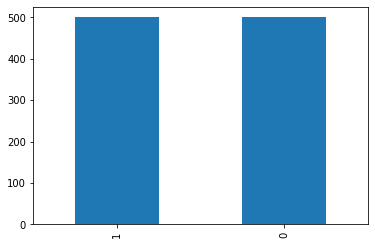

In [5]:
import seaborn as sns
# df['Liked'].value_counts().plot(kind="bar")
# sns.barplot(x=df['Review'],y=df['Liked'])
# sns.distplot(df['Liked'],hist=False)
df['Liked'].value_counts().plot(kind='bar')

In [6]:
x = df['Review'].values
y = df['Liked'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [9]:
# len(x_train) ********* 750

In [10]:
# len(x_test)************250

In [11]:
# len(y_train)*************750   

In [12]:
# len(y_test)*************250

In [13]:
x_train.shape

(750,)

In [14]:
x_test.shape

(250,)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 

In [16]:
x_train_vect.toarray()  #converted text into int

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# ***********************    METHOD 1 , (Creating Svc model)  ********************

In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

In [19]:
# predicting the 250 values (x_test_vect) FROM 750 values (x_train_values)

y_pred = model.predict(x_test_vect) 
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0])

In [20]:
# checking accuracy between y_test and newly predicted x_test
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.72

In [21]:
# METHOD 1 (SVC) ACCURACY SCORE ---- 72%

In [22]:
# *****************   METHOD 2 (PIPELINES)  ************************

In [23]:
# SVC = COUNTVECTORIZER

In [24]:
from sklearn.pipeline import make_pipeline
model2 = make_pipeline(CountVectorizer(),SVC())

In [25]:
# here don't need to convert value pipeline take care of it

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2


array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [26]:
accuracy_score(y_pred2,y_test)

0.792

In [27]:
# METHOD 2 (PIPELINES) ACCURACY SCORE --- 79.2%

In [28]:
# *****************   METHOD 2 (NAIVE BAYES (NB))  *******************

In [29]:
# Quiet similar to Method 1 (SVC)

from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit (x_train_vect,y_train)

MultinomialNB()

In [30]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [31]:
accuracy_score(y_pred3,y_test)

0.744

In [32]:
# METHOD 3 (NAIVE BYES (NB)) ACCURACY SCORE ---  74.4% 

In [33]:
# **************************** METHOD 4 (NB + COUNTVECTORIZER PIPELINE) **********************

In [34]:
# Quiet Similar to Method2 Pipeline 

from sklearn.pipeline import make_pipeline
model4 = make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [35]:
y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [36]:
accuracy_score(y_pred4,y_test)

0.784

In [37]:
# METHOD 4 (NB + COUNTVECTORIZER PIPELINE) ACCURACY SCORE ---  78.4% 

In [38]:
# METHOD 1 (SVC) ACCURACY SCORE ---- 72%
# METHOD 2 (PIPELINES) ACCURACY SCORE --- 79.2%
# METHOD 3 (NAIVE BYES (NB)) ACCURACY SCORE ---  74.4% 
# METHOD 4 (NB + COUNTVECTORIZER PIPELINE) ACCURACY SCORE ---  78.4% 

In [39]:
# HIGHEST ACCURACY SCORE IS COME FROM METHOD 2  ---  79.2%

In [40]:
# JOBLIB  --- (TO PREDICT, THE ENTERED REVIEW IS GOOD OR BAD) #based_on_MODEL2

In [41]:
import joblib
joblib.dump(model2,'reviewed')
import joblib
reload_model = joblib.load('reviewed')

In [42]:
# FOR POSITIVE REVIEW IT WILL GIVE ([1])
# FOR NEGATIVE REVIEW IT WILL GIVE ([0])

In [43]:
reload_model.predict(['nice food'])

array([1])

In [44]:
reload_model.predict(['very bad food'])

array([0])

In [45]:
# STREAMLIT  --- (TO CREATE WEB APP)

In [46]:
!pip install streamlit --quiet

     |████████████████████████████████| 10.3 MB 7.4 MB/s 
     |████████████████████████████████| 78 kB 4.8 MB/s 
     |████████████████████████████████| 4.7 MB 59.0 MB/s 
     |████████████████████████████████| 182 kB 66.1 MB/s 
     |████████████████████████████████| 164 kB 70.9 MB/s 
     |████████████████████████████████| 237 kB 62.4 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 7.7 MB/s 


In [47]:
%%writefile app.py
import streamlit as st
import joblib
st.title("(Good/Bad) Review Classifier")
reload_model = joblib.load('reviewed')

IP = st.text_input("Enter the Review")
OP = reload_model.predict([IP])

if st.button('PREDICT'):
  st.title(OP[0])

Writing app.py


In [48]:
# FOR RUNNIG STREAMLIT WEB APPLICATION

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

npx: installed 22 in 2.32s


your url is: https://little-waves-follow-34-125-182-226.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.182.226:8501

